In [1]:
from imageio import imread
from glob import iglob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from joblib import load
import json

In [2]:
faces = np.load("x.npy")[:100] / 255

In [3]:
pca = load("pca.joblib")
encoder = tf.keras.models.load_model("encoder.h5")
decoder = tf.keras.models.load_model("decoder.h5")

In [4]:
latent = encoder.predict(faces)
pc = pca.transform(latent)

In [5]:
rec = np.dot(pc, pca[1].components_)
rec = rec * pca[0].scale_ + pca[0].mean_
rec = decoder.predict(rec)

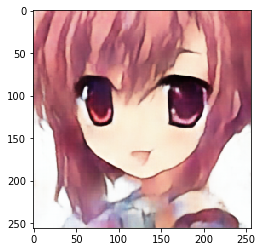

In [6]:
i = 0
plt.imshow(rec[i].reshape(256, 256, 3))

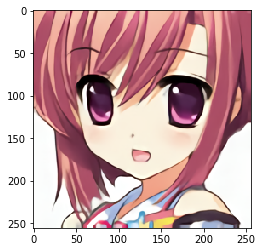

In [7]:
plt.imshow(faces[i].reshape(256, 256, 3))

In [9]:
with open("components.npy", "wb") as f:
    np.save(f, pca[1].components_.astype(np.float32))

with open("scale.npy", "wb") as f:
    np.save(f, pca[0].scale_.astype(np.float32))

with open("mean.npy", "wb") as f:
    np.save(f, pca[0].mean_.astype(np.float32))

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(decoder, "decoder")

In [ ]:
import math
print((math.sqrt(pca[1].explained_variance_ratio_.astype(np.float64)) * 100).round(2).tolist())

In [14]:
print(np.mean(pc, axis=0).round(5).tolist())

[-0.5968800187110901, 0.2924099862575531, -0.8195599913597107, 0.5217300057411194, -0.43487000465393066, -0.30309998989105225, 0.5253000259399414, -0.426470011472702, 0.8853200078010559, -0.27298998832702637, -0.023180000483989716, 0.6740400195121765, -0.05493000149726868, 0.3440299928188324, 0.603600025177002, 0.2725900113582611, -0.8029299974441528, 0.2862899899482727, -0.2807199954986572, -0.5548200011253357, -0.36649999022483826, -0.9082300066947937, 0.48559999465942383, -0.6038600206375122, 0.550059974193573, -0.31547999382019043, -0.22690999507904053, 0.09437000006437302, -0.32137998938560486, 0.3238300085067749, -0.3800399899482727, -0.16395999491214752, -0.0361500009894371, 0.6849899888038635, 0.06797000020742416, -0.6756399869918823, 0.1382099986076355, 0.6710799932479858, -0.09952999651432037, -0.6267799735069275, 0.4002400040626526, -0.26787999272346497, 0.1709499955177307, -0.15725000202655792, -0.23002000153064728, -0.04535999894142151, -0.770609974861145, -0.1902099996805

In [15]:
print(np.std(pc, axis=0).astype(np.float64).round(4).tolist())

[3.8664, 3.0579, 3.7632, 3.4219, 3.5348, 3.6322, 3.2413, 3.1893, 2.8131, 3.3553, 3.239, 3.0349, 2.8113, 3.2559, 2.7788, 3.3548, 3.0631, 3.3477, 2.6461, 2.768, 2.7905, 2.9242, 3.114, 2.8528, 2.9379, 2.7992, 2.8605, 2.4481, 3.161, 2.5111, 2.7383, 2.5243, 2.5627, 2.5354, 2.4586, 2.5627, 2.6683, 2.5185, 2.5436, 2.5153, 2.6281, 2.9918, 2.2614, 2.76, 2.1716, 2.4122, 2.6459, 2.3335, 2.0376, 1.8918, 2.4476, 2.2439, 2.2645, 2.1462, 2.6709, 2.4201, 2.5253, 1.9841, 2.3954, 2.3903, 2.6086, 2.3505, 2.044, 2.4611, 2.0457, 2.2703, 2.1895, 2.1646, 2.4413, 2.1778, 2.3542, 2.0577, 2.1399, 2.145, 2.1821, 1.9462, 1.569, 2.4076, 2.0323, 2.3893, 2.3566, 2.21, 2.0796, 1.9101, 2.0391, 2.0469, 2.4163, 2.1849, 2.1873, 2.0632, 2.0569, 2.2297, 2.0155, 2.2054, 1.983, 2.1551, 2.1257, 1.94, 2.3452, 2.0063, 1.8015, 2.1883, 1.9322, 1.947, 1.9635, 1.9082, 2.0561, 1.9944, 1.9281, 1.8401, 2.0447, 1.6669, 1.9982, 1.7268, 1.9178, 1.9636, 2.1886, 2.1173, 1.9592, 1.7842, 1.977, 1.9983, 2.0462, 2.0045, 1.8354, 1.8025, 1.7651,

In [16]:
pca[1].components_

array([[ 0.00427601, -0.00650353,  0.01584934, ...,  0.01293327,
         0.00019593,  0.01166772],
       [ 0.02058923,  0.02824689, -0.01538753, ...,  0.00273234,
        -0.01337717, -0.01037512],
       [-0.01874062,  0.00358441, -0.01461207, ...,  0.00626919,
         0.0123674 , -0.01101696],
       ...,
       [-0.00252239,  0.00378952,  0.00126286, ..., -0.01112564,
        -0.00963743,  0.00531565],
       [ 0.00376932, -0.00539748,  0.01176965, ...,  0.02817925,
         0.0115765 ,  0.04001662],
       [ 0.02093592, -0.01425088, -0.00797162, ...,  0.02168295,
        -0.01260965,  0.0092895 ]], dtype=float32)

In [17]:
pc = np.mean(pc, axis=0)
rec = np.dot(pc, pca[1].components_.astype(np.float16))
rec = rec * pca[0].scale_.astype(np.float16) + pca[0].mean_.astype(np.float16)

In [18]:
plt.imshow(rec.reshape(256, 256, 3).astype(np.int64))

ValueError: cannot reshape array of size 2048 into shape (256,256,3)